# Report Figures

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('paper')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = (5,5/1.618)

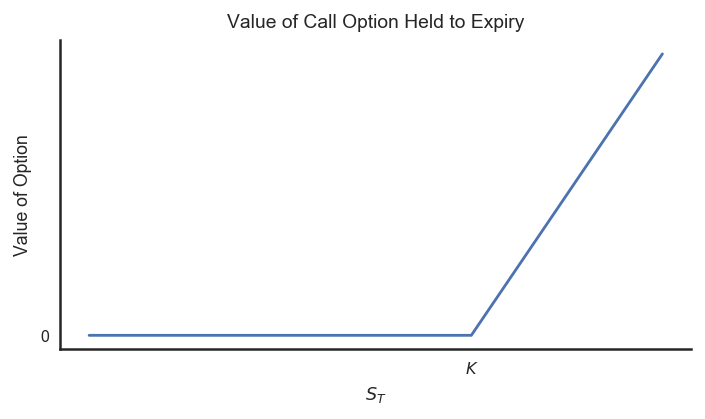

In [3]:
K = 100
x = np.linspace(0, 150, 100)

plt.plot(x, np.clip(x-K, 0, np.inf))
plt.ylabel('Value of Option')
plt.xlabel('$S_T$')
plt.title('Value of Call Option Held to Expiry')
plt.xticks([K,], ['$K$',])
plt.yticks([0,])
plt.tight_layout()
sns.despine()
plt.savefig('report/figs/calloptpayoff.eps')

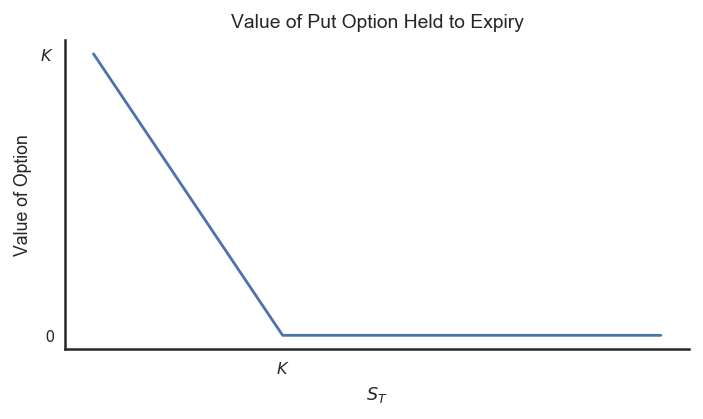

In [4]:
K = 50
x = np.linspace(0, 150, 100)

plt.plot(x, np.clip(K-x, 0, np.inf))
plt.ylabel('Value of Option')
plt.xlabel('$S_T$')
plt.title('Value of Put Option Held to Expiry')
plt.xticks([K,], ['$K$',])
plt.yticks([0,K], [0, '$K$'])
plt.tight_layout()
sns.despine()
plt.savefig('report/figs/putoptpayoff.eps')

In [5]:
%run report/scripts/blackscholesprice.py

In [6]:
pxs = black_scholes_price(K, .16, 1, x)

/Users/franciscorivera/Documents/Francisco/Harvard/07 Junior Fall/APMTH 205/project/report/scripts/blackscholesprice.py:26: RuntimeWarning: divide by zero encountered in true_divide
  d1 = (np.log(S / K) + (vol**2/2)*T) / (vol*np.sqrt(T))


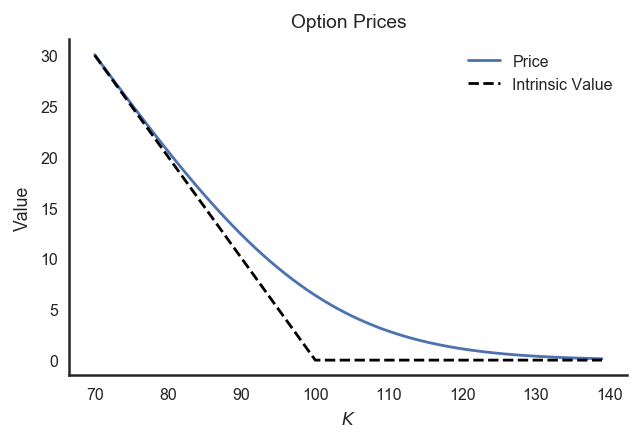

In [7]:
strikes = np.arange(70,140,1)
bs_px = black_scholes_price(100, .16, 1, strikes)

plt.plot(strikes, bs_px, label='Price')
plt.plot(strikes, np.clip(100-strikes, 0, np.inf), '--', c='k', label='Intrinsic Value')
plt.title('Option Prices')
plt.xlabel('$K$')
plt.ylabel('Value')
sns.despine()
plt.legend();
plt.savefig('report/figs/intrinsicvalue.eps')

In [8]:
x, y = np.meshgrid(range(8), range(5))
x1, y1 = np.meshgrid(range(1,7), range(1,4))

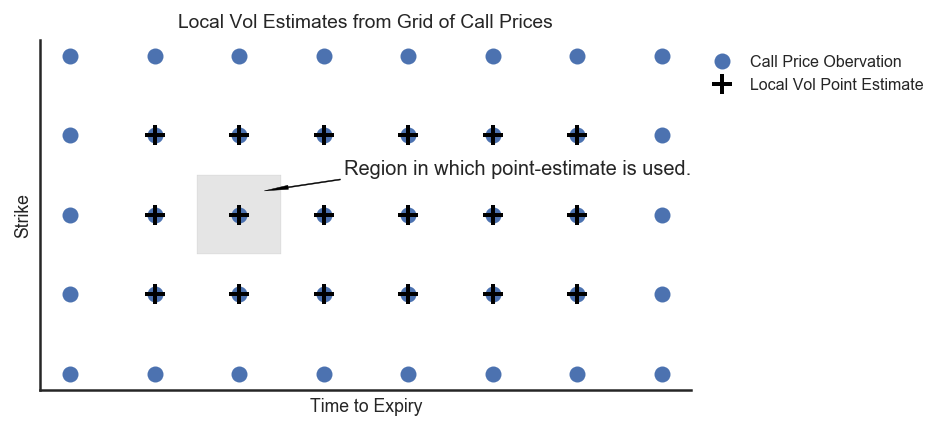

In [10]:
plt.plot(x.flatten(), y.flatten(), 'o', markersize=8, label='Call Price Obervation')
plt.plot(x1.flatten(), y1.flatten(), '+', c='k', mew=2, markersize=10, label='Local Vol Point Estimate')
plt.xlabel('Time to Expiry')
plt.ylabel('Strike')
lgd = plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.xticks([]); plt.yticks([])
plt.title('Local Vol Estimates from Grid of Call Prices')
plt.fill_between([1.5, 2.5], [2.5, 2.5], [1.5, 1.5], alpha=.1, color='k')
plt.annotate("Region in which point-estimate is used.", xy=(2.3,2.3),
             xytext=(40,8), textcoords="offset points", 
             arrowprops={'width': 0.5, 'headwidth': 2, 'color': 'k'})
sns.despine()
plt.tight_layout()
plt.savefig('report/figs/localvolgrid.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')